In [1]:
from PIL import Image
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
import os
DRIVE = '/gdrive'
WRK_DIR = DRIVE + '/MyDrive/Colab Notebooks/(Step 2) Normalized Images -> Unsupervised Features -> Conventional Classification'

drive.mount('/gdrive', force_remount=True)
os.chdir(WRK_DIR)

Mounted at /gdrive


In [3]:
import csv
list2 = []
'''
Exploring CSV for category labels
- Code Block Not Used

rows
0 - Headers
1 - 100: Benign
101 - 200: Normal
201 - 300: Invasive
301 - 400: Insitu
'''
feats_with_labels = feats
with open("/content/drive/My Drive/image_features.csv", newline='') as f:
  reader = csv.reader(f)
  count = 0
  for row in reader:
    if count >= 301:
      feats_with_labels = np.append(feats_with_labels, "Insitu")
    elif count >= 201:
      feats_with_labels = np.append(feats_with_labels, "Invasive")
    elif count == 101:
      feats_with_labels = np.append(feats_with_labels, "Normal")
    elif count >= 1:
      feats_with_labels = np.append(feats_with_labels, "Benign")

    count += 1
    

NameError: ignored

In [3]:
#X Extracted Feature set
X = np.load('VGG16_Extracted_Features.npy')

#Making Correspoding Y Labels
b_label = ["Benign"] * 100
n_label = ["Normal"] * 100
inv_label = ["Invasive"] * 100
ins_label = ["Insitu"] * 100
y = b_label + n_label + inv_label + ins_label

In [ ]:
X.shape

(400, 1572864)

In [ ]:
400 * 1572864

629145600

In [ ]:
count = np.count_nonzero(X)

print("Number of non-zero elements:", count)

Number of non-zero elements: 66467498


In [ ]:
np.min(X)

0.0

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler

#Standard Scale features
scaler = StandardScaler()
scaler.fit(X_train)
X_sc_train = scaler.transform(X_train)
X_sc_test = scaler.transform(X_test)

In [6]:
print(X_sc_train.shape)
print(X_sc_test.shape)

(320, 1572864)
(80, 1572864)


Text(0, 0.5, 'Cumulative explained variance')

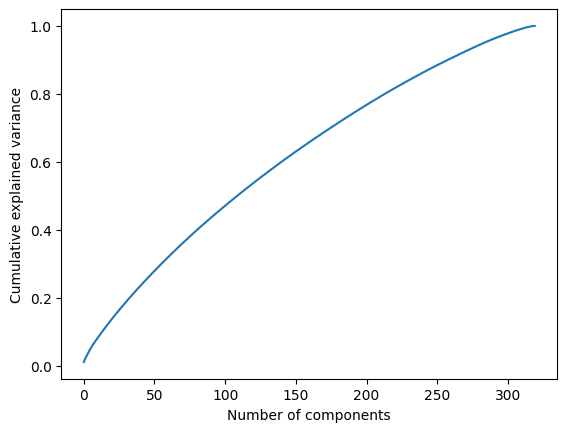

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###--UNSUPERVISED LEARNING--##
#Exploring optimal # of components for PCA Dimensionality Reduction
'''
https://towardsdatascience.com/dealing-with-highly-dimensional-data-using-principal-component-analysis-pca-fea1ca817fe6
'''
pca = PCA(n_components=320)
pca.fit(X_sc_train)

#Using PCA cum. explained variance to measure the usefulness of principal components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [10]:
from sklearn.decomposition import PCA

#PCA Dimensionality Reduction on data
pca = PCA(n_components=300)
X_train_transformed = pca.fit_transform(X_sc_train)
X_test_transformed = pca.transform(X_sc_test)

In [11]:
print(X_train_transformed.shape)
print(X_test_transformed.shape)

(320, 300)
(80, 300)


In [7]:
#Deleting variables not in use anymore to save RAM
del X, y, b_label, ins_label, inv_label, n_label, X_train, X_test

In [6]:
from sklearn.svm import SVC

SVM_model = SVC()
SVM_model.fit(X_sc_train, y_train)
SVM_y_preds = SVM_model.predict(X_sc_test)

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, SVM_y_preds, labels=["Benign", "Normal", "Invasive", "Insitu"]))

              precision    recall  f1-score   support

      Benign       0.00      0.00      0.00        26
      Normal       0.23      1.00      0.37        18
    Invasive       1.00      0.06      0.11        18
      Insitu       0.00      0.00      0.00        18

    accuracy                           0.24        80
   macro avg       0.31      0.26      0.12        80
weighted avg       0.28      0.24      0.11        80



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
del SVM_model, SVM_y_preds

In [12]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=11)
KNN_model.fit(X_train_transformed, y_train)
KNN_y_preds = KNN_model.predict(X_test_transformed)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, KNN_y_preds, labels=["Benign", "Normal", "Invasive", "Insitu"]))

              precision    recall  f1-score   support

      Benign       0.00      0.00      0.00        26
      Normal       0.00      0.00      0.00        18
    Invasive       0.23      1.00      0.37        18
      Insitu       0.00      0.00      0.00        18

    accuracy                           0.23        80
   macro avg       0.06      0.25      0.09        80
weighted avg       0.05      0.23      0.08        80



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from sklearn.preprocessing import LabelEncoder

# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_train)
y_train_label_encoded = label_encoder.transform(y_train)
y_test_label_encoded = label_encoder.transform(y_test)

In [16]:
from xgboost import XGBClassifier
# fit model no training data
Xgb_clf = XGBClassifier()
Xgb_clf.fit(X_sc_train, y_train_label_encoded)
XGB_y_preds = Xgb_clf.predict(X_sc_test)

KeyboardInterrupt: ignored

In [ ]:
print(classification_report(y_test_label_encoded, XGB_y_preds, labels=["Benign", "Normal", "Invasive", "Insitu"]))

# Mahdi's Experiments

In [ ]:
X_train.shape

(320, 1572864)

In [ ]:
#PCA Dimensionality Reduction on data
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=1000)

# Apply TruncatedSVD to X

X_transformed = svd.fit_transform(X)
# X_test_transformed = svd.transform(X_test)

In [ ]:
X_transformed.shape

(400, 400)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

SVM_model = SVC()
SVM_model.fit(X_train, y_train)
SVM_y_preds = SVM_model.predict(X_test)

KNN_model = KNeighborsClassifier(n_neighbors=11)
KNN_model.fit(X_train, y_train)
KNN_y_preds = KNN_model.predict(X_test)

In [ ]:
SVM_y_preds

array(['Insitu', 'Insitu', 'Benign', 'Insitu', 'Invasive', 'Insitu',
       'Insitu', 'Invasive', 'Invasive', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Invasive', 'Insitu',
       'Normal', 'Invasive', 'Normal', 'Normal', 'Insitu', 'Insitu',
       'Normal', 'Insitu', 'Normal', 'Insitu', 'Invasive', 'Normal',
       'Insitu', 'Normal', 'Invasive', 'Normal', 'Invasive', 'Normal',
       'Insitu', 'Insitu', 'Insitu', 'Normal', 'Insitu', 'Insitu',
       'Normal', 'Insitu', 'Invasive', 'Insitu', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Insitu', 'Insitu', 'Normal',
       'Insitu', 'Insitu', 'Invasive', 'Normal', 'Benign', 'Normal',
       'Normal', 'Invasive', 'Invasive', 'Normal', 'Insitu', 'Benign',
       'Normal', 'Insitu', 'Insitu', 'Normal', 'Insitu', 'Benign',
       'Normal', 'Insitu', 'Insitu', 'Invasive', 'Invasive', 'Normal',
       'Normal', 'Invasive'], dtype='<U8')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, SVM_y_preds, labels=["Benign", "Normal", "Invasive", "Insitu"]))
print(classification_report(y_test, KNN_y_preds, labels=["Benign", "Normal", "Invasive", "Insitu"]))

              precision    recall  f1-score   support

      Benign       0.75      0.12      0.20        26
      Normal       0.42      0.78      0.55        18
    Invasive       0.73      0.61      0.67        18
      Insitu       0.50      0.78      0.61        18

    accuracy                           0.53        80
   macro avg       0.60      0.57      0.51        80
weighted avg       0.62      0.53      0.48        80

              precision    recall  f1-score   support

      Benign       0.00      0.00      0.00        26
      Normal       0.00      0.00      0.00        18
    Invasive       0.23      1.00      0.37        18
      Insitu       0.00      0.00      0.00        18

    accuracy                           0.23        80
   macro avg       0.06      0.25      0.09        80
weighted avg       0.05      0.23      0.08        80



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# New Features


In [ ]:
X = np.load('/gdrive/My Drive/my_list.npy')


In [ ]:
X1 = np.load('/gdrive/My Drive/my_list_global.npy')

In [ ]:
X = X.reshape((3200, 1000))
X1 = X1.reshape((3200, 1000))

In [ ]:
X_concatenated = np.concatenate((X, X1), axis=1)

In [ ]:
X_concatenated.shape

(3200, 2000)

In [ ]:
b_label = [0] * 800
n_label = [1] * 800
inv_label = [2] * 800
ins_label = [3] * 800
y = b_label + n_label + inv_label + ins_label

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_concatenated, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Standard Scale features
scaler = StandardScaler()
scaler.fit(X_train)
X_sc_train = scaler.transform(X_train)
X_sc_test = scaler.transform(X_test)

In [ ]:
pca = PCA(n_components=500)
X_train_transformed = pca.fit_transform(X_train)
X_test_transformed = pca.transform(X_test)

In [ ]:
X_train.shape

(2560, 2000)

In [ ]:
import lightgbm as lgb

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
# fit model no training data
Xgb_clf = XGBClassifier()
Xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
XGB_y_preds = Xgb_clf.predict(X_test)

In [ ]:
clf = lgb.LGBMClassifier()
clf.fit(X_train_transformed, y_train)

LGBMClassifier()

In [ ]:
LGB_y_preds = clf.predict(X_test_transformed)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

SVM_model = SVC()
SVM_model.fit(X_train_transformed, y_train)
SVM_y_preds = SVM_model.predict(X_test_transformed)

# KNN_model = KNeighborsClassifier(n_neighbors=11)
# KNN_model.fit(X_train_transformed, y_train)
# KNN_y_preds = KNN_model.predict(X_test_transformed)

In [ ]:
from sklearn.metrics import classification_report
# print(classification_report(y_test, SVM_y_preds, labels=["Benign", "Normal", "Invasive", "Insitu"]))
# print(classification_report(y_test, SVM_y_preds))
# print(classification_report(y_test, KNN_y_preds, labels=["Benign", "Normal", "Invasive", "Insitu"]))
print(classification_report(y_test, XGB_y_preds))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, SVM_y_preds)

0.6203125

In [ ]:
SVM_y_preds

array([2, 0, 2, 1, 0, 2, 0, 3, 3, 1, 1, 0, 2, 1, 0, 3, 1, 3, 2, 1, 0, 1,
       1, 1, 1, 2, 0, 1, 1, 3, 2, 1, 1, 3, 1, 0, 2, 3, 0, 1, 3, 0, 1, 3,
       0, 2, 2, 1, 1, 0, 1, 3, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 3, 0, 2,
       1, 3, 0, 1, 1, 0, 1, 1, 3, 1, 0, 0, 3, 3, 0, 1, 1, 1, 2, 2, 0, 2,
       1, 2, 3, 0, 3, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0, 1, 0, 3, 1, 2, 2, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 1, 1, 3, 0, 2, 1,
       3, 2, 0, 2, 2, 1, 2, 0, 0, 3, 3, 3, 3, 3, 2, 2, 0, 1, 3, 2, 1, 3,
       1, 0, 0, 3, 3, 2, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 1, 0, 2, 1,
       0, 1, 0, 0, 0, 2, 1, 0, 1, 3, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 1,
       0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 3, 3, 0, 3, 1, 2, 0, 1, 1, 1, 0, 1,
       3, 3, 2, 3, 0, 2, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 1, 2, 3, 1, 2, 1,
       1, 3, 2, 0, 2, 1, 1, 3, 3, 0, 1, 3, 2, 0, 2, 3, 1, 1, 0, 3, 3, 2,
       1, 0, 3, 0, 2, 1, 1, 0, 1, 3, 0, 3, 2, 3, 0, 1, 1, 3, 2, 3, 1, 0,
       1, 0, 3, 0, 1, 3, 3, 0, 3, 1, 1, 3, 0, 0, 2,